| Field | Value |
|-|-|
| simulation file | stdp_figure_sjostrom_switch.py |
| result files prefix | stdp_figure_sjostrom_switch |
| # result files | 100\*1 = 100 |
| simulation start | 2015-04-10 16:38:48 |
| simulation end | 2015-04-10 16:42:08 |
| duration | 0:03:20 |
| repository | https:/ |
| revision hash | [bb32097158f190eead959f186214c042804d5fcc](https://tree/bb32097158f190eead959f186214c042804d5fcc) |

### Results
<font color='grey'>n/a</font>

### Conclusion
<font color='grey'>n/a</font>

In [1]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get(i, r_max):
    return cPickle.load(open('stdp_figure_sjostrom_switch_i_{0}_r_max_{1}.p'.format(i, r_max),'rb'))


i_s = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
r_max_s = [0.35]


params = list(product(i_s, r_max_s))

data = {tup:get(*tup) for tup in params}

In [3]:
sjo_l2 = loadtxt('./experimental_data/sjo_switch_L23.csv',delimiter=',')
sjo_l5 = loadtxt('./experimental_data/sjo_switch_L5.csv',delimiter=',')
sjo_ext = loadtxt('./experimental_data/sjo_switch_extrac.csv',delimiter=',')
print sjo_l2.shape[0]+sjo_l5.shape[0]+sjo_ext.shape[0]

71


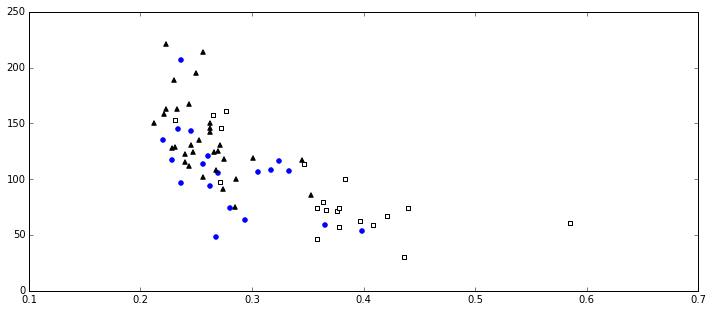

In [4]:
def map_scales(x_sjo):
    return (0.4*x_sjo/15.0)+0.2
figure(figsize=(12,5))
scatter(map_scales(sjo_l2[:,0]),sjo_l2[:,1],marker='o',color='blue')
scatter(map_scales(sjo_l5[:,0]),sjo_l5[:,1],marker='^',color='black')
scatter(map_scales(sjo_ext[:,0]),sjo_ext[:,1],marker='s',facecolors='white',edgecolors='black')

In [5]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

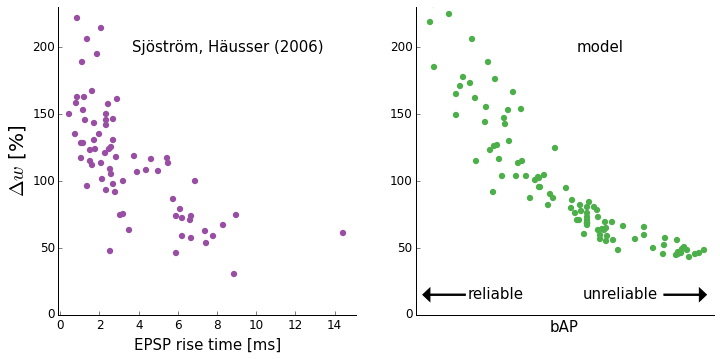

In [6]:
figure(figsize=(10,5))
ax=subplot(1,2,1)
scatter(sjo_l2[:,0],sjo_l2[:,1],s=40,lw=0,color='#984ea3')
scatter(sjo_l5[:,0],sjo_l5[:,1],s=40,lw=0,color='#984ea3')
scatter(sjo_ext[:,0],sjo_ext[:,1],s=40,lw=0,color='#984ea3')
simpleaxis(gca())
xticks(xticks()[0],fontsize=12)
yticks(yticks()[0],fontsize=12)
text(8.5,200,u'Sjöström, Häusser (2006)',fontsize=15,verticalalignment='center',horizontalalignment='center')
xlim([-0.1,15.1])
ylabel('$\Delta w$ [%]',fontsize=20)
xlabel('EPSP rise time [ms]',fontsize=15)
ylim([0,230])
subplot(1,2,2)
dws = []
ps = []
for i in i_s:
    curr = data[(i,r_max_s[0])]
    p = curr[0]
    ps.append(p)
    acc = curr[1][0]
    dws.append(acc.res['weights'][-1]/acc.res['weights'][0])
scatter(1-array(ps), 100*array(dws), c='#4daf4a',lw=0,s=40)
xlim([0.19,0.61])
simpleaxis(gca())
yticks(yticks()[0],fontsize=12)
xticks([])
text(0.45,200,u'model',fontsize=15,verticalalignment='center',horizontalalignment='center')
gca().arrow(0.26, 15, -0.05, 0, head_width=10, head_length=0.01, fc='k', ec='k',width=1)
gca().arrow(0.54, 15, 0.05, 0, head_width=10, head_length=0.01, fc='k', ec='k',width=1)
ylim([0,230])
text(0.265,15,'reliable',verticalalignment='center',horizontalalignment='left',fontsize=15)
text(0.53,15,'unreliable',verticalalignment='center',horizontalalignment='right',fontsize=15)
xlabel('bAP',fontsize=15)
subplots_adjust(left=0.08,top=0.98,right=0.99)
savefig('stdp_figure_sjostrom_switch.pdf')